# Rainfall Prediction using a Time Series Auto ARIMA Model

In [1]:
import pandas as pd
import dateutil
from datetime import datetime
import numpy as np
import matplotlib.pyplot as plt
import warnings
import itertools
import scipy
from matplotlib.pylab import rcParams
import statsmodels.api as sm
from statsmodels.tsa.seasonal import seasonal_decompose 
import pyramid as pm
from sklearn import metrics
from pyramid.arima import auto_arima
warnings.filterwarnings('ignore')
from sklearn.utils.validation import check_array as check_arrays

C:\Users\Welcome\Anaconda3\lib\site-packages\pyramid\__init__.py:68: UserWarning: 
    The 'pyramid' package will be migrating to a new namespace beginning in 
    version 1.0.0: 'pmdarima'. This is due to a package name collision with the
    Pyramid web framework. For more information, see Issue #34:
    
        https://github.com/tgsmith61591/pyramid/issues/34
        
    The package will subsequently be installable via the name 'pmdarima'; the
    only functional change to the user will be the import name. All imports
    from 'pyramid' will change to 'pmdarima'.
    
  """, UserWarning)


In [2]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [3]:
dataset = pd.read_csv("Kerala.csv")
data = dataset[dataset.SUBDIVISION == 'Kerala']

Lets perform the Monthly Prediction of Rainfall using Time series model 


In [4]:
data1 = data.iloc[:,2:14]

In [5]:
data1 = data1.reset_index()

In [6]:
data1 = data1.drop(['index'],axis=1)

In [7]:
data2 = data1.stack().reset_index()

In [8]:
data2 = data2.drop(['level_0'],axis=1)

In [9]:
data2.columns =['Month','Rainfall']

In [10]:
data2 = data2.drop(['Month'],axis=1)

In [11]:
arr = [ ]
mon = int(2)
def createMonth(year):
    for year in range(1901,2018):
        for mon in range(1,13):
            val = str(str(year) +'-'+ str(mon).rjust(2, '0'))
            arr.append(val)
    

In [12]:
createMonth(1901)

In [13]:
dfm = pd.DataFrame({'Month': arr})

In [14]:
dfinal = pd.concat([dfm,data2], axis=1)

In [15]:
dfinal.head()

,Month,Rainfall
0,1901-01,28.7
1,1901-02,44.7
2,1901-03,51.6
3,1901-04,160.0
4,1901-05,174.7


In [16]:
dfinal['Month'] = dfinal['Month'].apply(dateutil.parser.parse)

In [17]:
dfinal.head()

,Month,Rainfall
0,1901-01-08,28.7
1,1901-02-08,44.7
2,1901-03-08,51.6
3,1901-04-08,160.0
4,1901-05-08,174.7


In [18]:
ts = dfinal.set_index('Month', drop=True)

Text(0.5,1,'Rainfall in Kerala')

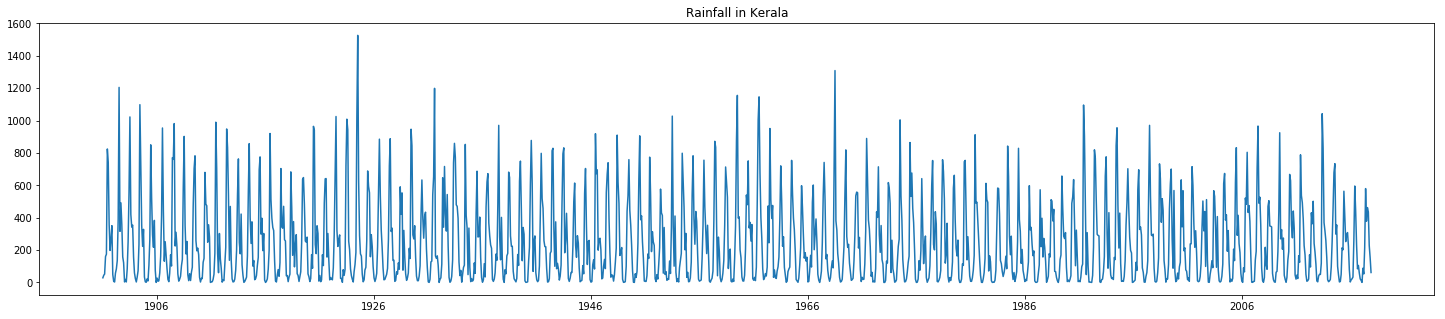

In [19]:
from matplotlib import pyplot
plt.figure(figsize=(25,5))
plt.plot(ts)
plt.title('Rainfall in Kerala')
plt.show()

### Auto ARIMA Model

In [20]:
from pyramid.arima.stationarity import ADFTest
adf_test = ADFTest(alpha=0.05)
adf_test.is_stationary(ts)

(0.99, False)

In [21]:
ts.shape

(1404, 1)

Lets validate for the last 10 years

In [22]:
AA_train = ts[:1368]
AA_test = ts[1368:]

In [23]:
AA_train.shape
AA_test.shape

(1368, 1)

(36, 1)

In [24]:
Arima_model = auto_arima(AA_train, start_p =1,start_q =1,max_p =8,max_q =8,
                        start_P =1,start_Q =1,max_P =8,max_Q =8,
                         m=12,seasonal = True, trace = True, d=1, D=1,
                         error_action = 'warn', suppress_warnings = True,
                         stepwise = True, random_state = 20, n_fits = 50 )
Arima_model.summary()

Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 1, 12); AIC=16861.684, BIC=16892.953, Fit time=12.584 seconds
Fit ARIMA: order=(0, 1, 0) seasonal_order=(0, 1, 0, 12); AIC=18592.308, BIC=18602.731, Fit time=0.176 seconds
Fit ARIMA: order=(1, 1, 0) seasonal_order=(1, 1, 0, 12); AIC=17817.126, BIC=17837.973, Fit time=4.145 seconds
Fit ARIMA: order=(0, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16867.210, BIC=16888.056, Fit time=7.089 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(0, 1, 1, 12); AIC=16867.842, BIC=16893.900, Fit time=14.445 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 1, 12); AIC=16860.054, BIC=16896.535, Fit time=45.895 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 0, 12); AIC=17153.803, BIC=17185.072, Fit time=26.256 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(2, 1, 2, 12); AIC=16865.701, BIC=16907.393, Fit time=28.965 seconds
Fit ARIMA: order=(1, 1, 1) seasonal_order=(1, 1, 0, 12); AIC=17272.969, BIC=17299.027, Fit time=5.848 seconds
Fit A

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                                  y   No. Observations:                 1368
Model:             SARIMAX(0, 1, 1)x(2, 1, 1, 12)   Log Likelihood               -8423.400
Date:                            Fri, 08 Mar 2019   AIC                          16858.800
Time:                                    03:15:39   BIC                          16890.069
Sample:                                         0   HQIC                         16870.508
                                           - 1368                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept      0.0003      0.001      0.474      0.635      -0.001       0.002
ma.L1         -1.0000      0.622     -1.607      0.108      -2.219       0.220
ar.S.L12       0.0772      0.018      4.177      0.000       0.041       0.113
ar.S.L24       0.0528      0.018      2.925      0.003       0.017       0.088
ma.S.L12      -1.0000      0.622     -1.608      0.108      -2.219       0.219
sigma2      1.399e+04    4.3e-05   3.26e+08      0.000     1.4e+04     1.4e+04
===================================================================================
Ljung-Box (Q):                       29.61   Jarque-Bera (JB):              1751.89
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               0.69   Skew:                             0.67
Prob(H) (two-sided):                  0.00   Kurtosis:                         8.41
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
[2] Covariance matrix is singular or near-singular, with condition number 3.02e+24. Standard errors may be unstable.
"""

In [25]:
prediction = pd.DataFrame(Arima_model.predict(n_periods =36), index = AA_test.index)
prediction.columns = ['Predicted rainfall']

In [26]:
prediction.head()

,Predicted rainfall
Month,
2015-01-08,3.665288
2015-02-08,8.893716
2015-03-08,28.369230
2015-04-08,97.828578
2015-05-08,218.227045


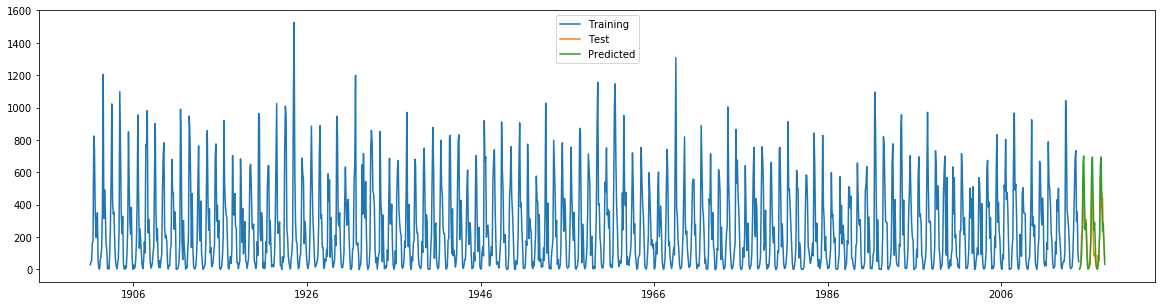

In [27]:
plt.figure(figsize = (20,5))
plt.plot(AA_train,label = 'Training')
plt.plot(AA_test, label = 'Test')
plt.plot(prediction, label = 'Predicted')
plt.legend(loc = 'upper center')
plt.show()

In [28]:
AA_test['Predicted_Rainfall'] = prediction

In [29]:
AA_test['Error'] =  AA_test['Rainfall'] -  AA_test['Predicted_Rainfall']

In [30]:
AA_test.head()

,Rainfall,Predicted_Rainfall,Error
Month,,,
2015-01-08,3.1,3.665288,-0.565288
2015-02-08,5.8,8.893716,-3.093716
2015-03-08,50.1,28.369230,21.730770
2015-04-08,214.1,97.828578,116.271422
2015-05-08,201.8,218.227045,-16.427045


### Metrics

In [32]:
metrics.mean_absolute_error(AA_test.Rainfall,AA_test.Predicted_Rainfall)

78.3541017644975

In [33]:
metrics.median_absolute_error(AA_test.Rainfall,AA_test.Predicted_Rainfall)

47.39361908434879

In [38]:
#auto_arima?

Text(0.5,1,'Error Distribution Over time')

((array([-2.07334886, -1.68217954, -1.44830429, -1.27437681, -1.13225357,
         -1.00993636, -0.90112151, -0.80205412, -0.71029762, -0.62416759,
         -0.54243995, -0.46418751, -0.38868208, -0.31533241, -0.24364313,
         -0.17318609, -0.10357945, -0.03447167,  0.03447167,  0.10357945,
          0.17318609,  0.24364313,  0.31533241,  0.38868208,  0.46418751,
          0.54243995,  0.62416759,  0.71029762,  0.80205412,  0.90112151,
          1.00993636,  1.13225357,  1.27437681,  1.44830429,  1.68217954,
          2.07334886]),
  array([-316.97553001, -294.97907686, -253.2226515 , -202.65795594,
         -185.09435238, -184.37150844, -156.68561562,  -93.48486695,
          -88.92834086,  -67.1509753 ,  -66.20058779,  -57.99375617,
          -47.97584406,  -41.03970172,  -16.42704468,  -10.00870454,
           -7.9846515 ,   -6.72228161,   -5.09248629,   -3.09371617,
           -2.06294542,   -0.63575429,   -0.56528825,    9.10675555,
            9.18344914,   18.59549916,   21.

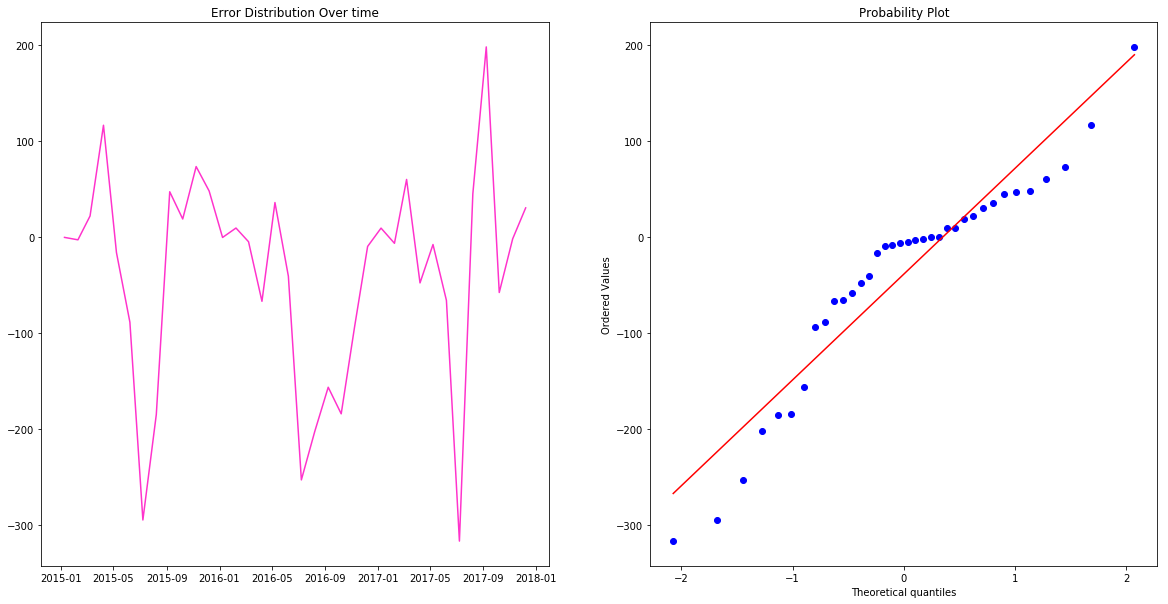

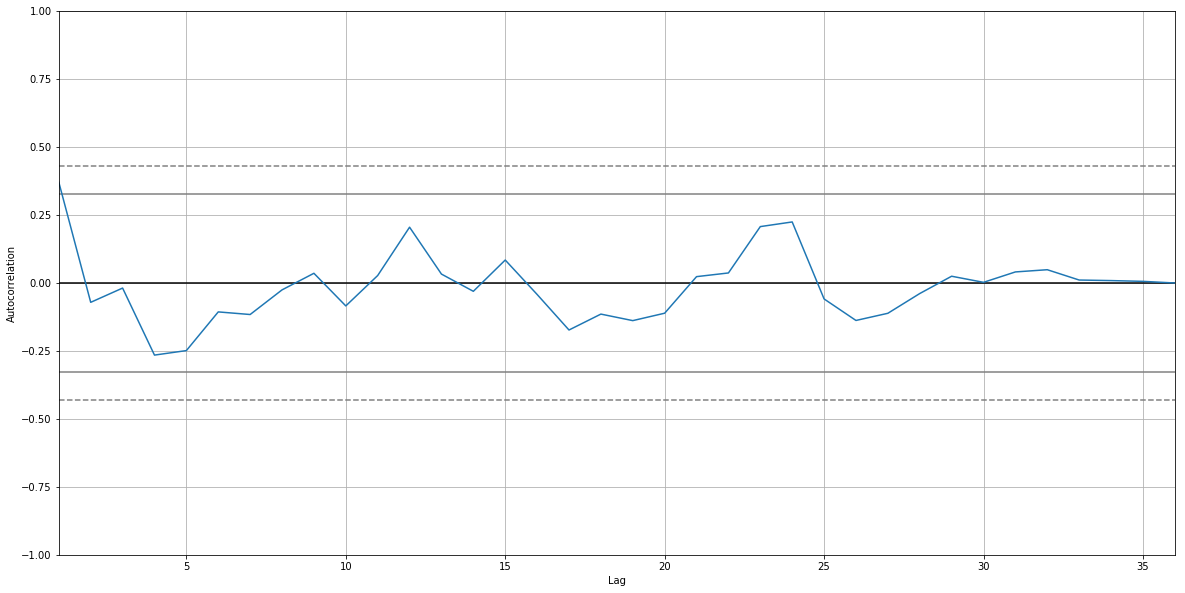

In [39]:
plt.figure(figsize =(20,10))
plt.subplot(121)
plt.plot(AA_test.Error,color = '#ff33CC')
plt.title('Error Distribution Over time')
plt.subplot(122)
scipy.stats.probplot(AA_test.Error,plot =plt)
plt.show()

plt.figure(figsize =(20,10))
pm.autocorr_plot(AA_test.Error)
plt.show()

Overall, model performance looks quite robust from these charts.